# Importance Sampling
### Evaluating Integrals using Monte Carlo



In [1]:
#Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import pandas as pd
import math

In [2]:
SAMPLE_SIZE = 10000
TRIALS = 100

# Q1. ∫sin(x)dx from [0,π/2]

=cos(x)[at 0 - at π/2] = 1.0

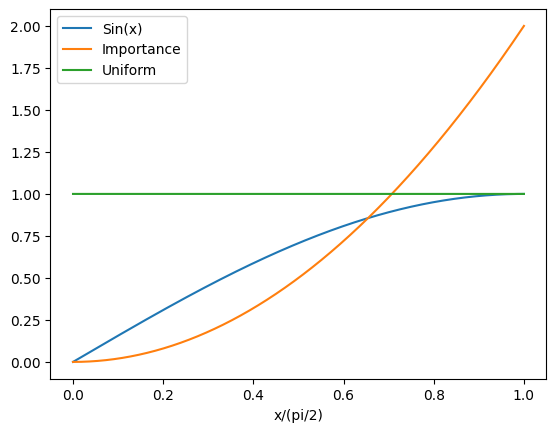

In [3]:
q1_res = 1.0
x = np.linspace(start=0,stop=np.pi/2,num=SAMPLE_SIZE)
fx = np.sin(x)
q1_d = (8*x*x)/(np.pi*np.pi)
q1_u = np.ones_like(q1_d)
plt.plot(2*x/np.pi,fx)
plt.plot(2*x/np.pi,q1_d)
plt.plot(2*x/np.pi,q1_u)
plt.legend(['Sin(x)','Importance','Uniform'])
plt.xlabel('x/(pi/2)')
plt.show()

In [4]:
#Uniform Sampling
def q1_uniform():
    q1_uniform = np.array([])
    for i in range(SAMPLE_SIZE):
        z = int(rand.random()*SAMPLE_SIZE)
        q1_uniform = np.append(q1_uniform, fx[z]*q1_u[z])

    #print(np.sum(q1_uniform)*np.pi/(2*SAMPLE_SIZE))
    return np.sum(q1_uniform)*np.pi/(2*SAMPLE_SIZE)

In [5]:
#prob distribution fxn fx = 8(x^2)/(pi^2)
def q1_importance():
    q1_distrib = np.array([])
    for i in range(SAMPLE_SIZE):
        z = int(rand.random()*SAMPLE_SIZE)
        q1_distrib = np.append(q1_distrib, fx[z]*q1_d[z])

    #print(np.sum(q1_distrib)*np.pi/(2*SAMPLE_SIZE))
    return np.sum(q1_distrib)*np.pi/(2*SAMPLE_SIZE)

In [6]:
q1_uniform_res = np.zeros(TRIALS)
q1_importance_res = np.zeros(TRIALS)

q1_uniform_error = np.zeros(TRIALS)
q1_importance_error = np.zeros(TRIALS)

for i in range(TRIALS):
    q1_uniform_res[i] = q1_uniform()
    q1_uniform_error[i] = np.abs(q1_uniform_res[i]-q1_res)
    q1_importance_res[i] = q1_importance()
    q1_importance_error[i] = np.abs(q1_importance_res[i]-q1_res)

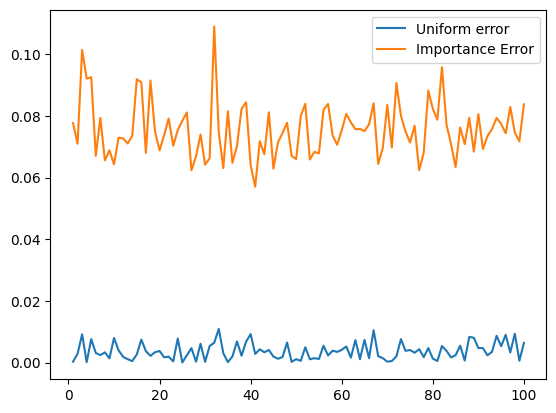

     I_uniform  error_uniform  I_importance  error_importance
1     0.999726       0.000274      0.922350          0.077650
2     1.002828       0.002828      0.929052          0.070948
3     0.990828       0.009172      0.898614          0.101386
4     0.999861       0.000139      0.907930          0.092070
5     0.992392       0.007608      0.907479          0.092521
..         ...            ...           ...               ...
96    0.991007       0.008993      0.925678          0.074322
97    0.996736       0.003264      0.917090          0.082910
98    0.990664       0.009336      0.925441          0.074559
99    1.000585       0.000585      0.928278          0.071722
100   0.993628       0.006372      0.916292          0.083708

[100 rows x 4 columns]


In [7]:
q1_data = pd.DataFrame({'I_uniform':q1_uniform_res,
            'error_uniform':q1_uniform_error,
            'I_importance':q1_importance_res,
            'error_importance':q1_importance_error})
index_ = np.arange(TRIALS)
q1_data.index = index_+1
plt.plot(index_+1,q1_uniform_error)
plt.plot(index_+1,q1_importance_error)
plt.legend(['Uniform error','Importance Error'])
plt.show()
print(q1_data)

# Q2. ∫exp(-x)dx from [0,1]
= exp(-x) at 0 - exp(-x) at 1 = 1 - 1/e 

Based on the below graph, we cam take a sample 1-x/2 that would fit it better

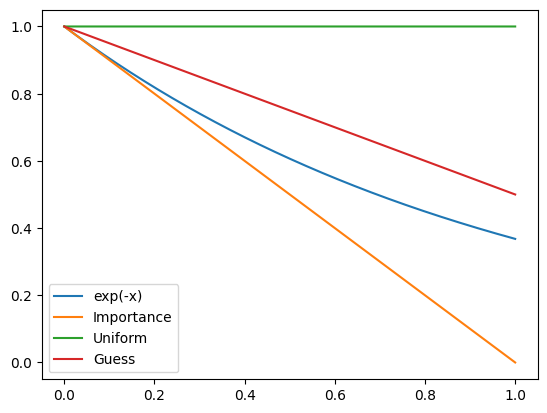

In [8]:
q2_res = 1.0 - (1/np.e)
x = np.linspace(start=0,stop=1,num=SAMPLE_SIZE)
fx = np.exp(-1.0*x)
q2_d = 1-x
q2_u = np.ones_like(q2_d)
q2_g = 1-x/2
plt.plot(x,fx)
plt.plot(x,q2_d)
plt.plot(x,q2_u)
plt.plot(x,q2_g)
plt.legend(['exp(-x)','Importance','Uniform','Guess'])
plt.show()

In [9]:
#Uniform Sampling
def q2_uniform():
    q2_uniform = np.array([])
    for i in range(SAMPLE_SIZE):
        z = int(rand.random()*SAMPLE_SIZE)
        q2_uniform = np.append(q2_uniform, fx[z]*q2_u[z])

    #print(np.sum(q2_uniform)*np.pi/(2*SAMPLE_SIZE))
    return np.sum(q2_uniform)/(SAMPLE_SIZE)

In [10]:
#prob distribution fxn fx = 1-x
def q2_importance():
    q2_distrib = np.array([])
    for i in range(SAMPLE_SIZE):
        z = int(rand.random()*SAMPLE_SIZE)
        q2_distrib = np.append(q2_distrib, fx[z]*q2_d[z])

    #print(np.sum(q2_distrib)/SAMPLE_SIZE))
    return np.sum(q2_distrib)/(SAMPLE_SIZE)

In [11]:
#prob distribution fxn fx = 1-x/2
def q2_guess():
    q1_gs = np.array([])
    for i in range(SAMPLE_SIZE):
        z = int(rand.random()*SAMPLE_SIZE)
        q1_gs = np.append(q1_gs, fx[z]*q2_g[z])

    #print(np.sum(q1_distrib)*np.pi/(2*SAMPLE_SIZE))
    return np.sum(q1_gs)/(SAMPLE_SIZE)

In [12]:
q2_uniform_res = np.zeros(TRIALS)
q2_importance_res = np.zeros(TRIALS)
q2_guess_res = np.zeros(TRIALS)

q2_uniform_error = np.zeros(TRIALS)
q2_importance_error = np.zeros(TRIALS)
q2_guess_error = np.zeros(TRIALS)

for i in range(TRIALS):
    q2_uniform_res[i] = q2_uniform()
    q2_uniform_error[i] = np.abs(q2_uniform_res[i]-q2_res)/q2_res
    q2_importance_res[i] = q2_importance()
    q2_importance_error[i] = np.abs(q2_importance_res[i]-q2_res)/q2_res
    q2_guess_res[i] = q2_guess()
    q2_guess_error[i] = np.abs(q2_guess_res[i]-q2_res)/q2_res

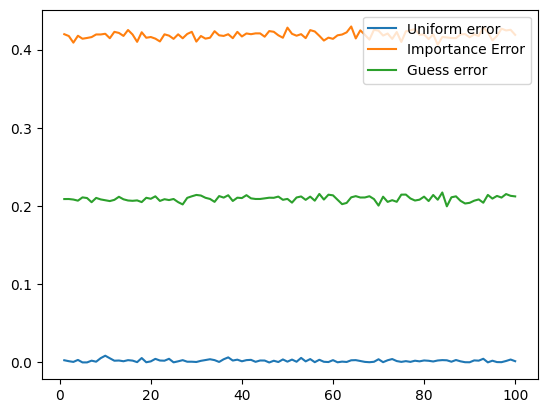

     I_uniform  error_uniform  I_importance  error_importance   I_guess  \
1     0.630307       0.002869      0.366763          0.419789  0.500016   
2     0.633174       0.001667      0.368260          0.417421  0.499985   
3     0.631644       0.000754      0.373591          0.408988  0.500408   
4     0.634203       0.003294      0.368031          0.417784  0.501317   
5     0.632188       0.000106      0.370432          0.413986  0.498661   
..         ...            ...           ...               ...       ...   
96    0.631785       0.000530      0.368169          0.417566  0.497484   
97    0.631857       0.000417      0.362324          0.426812  0.498821   
98    0.630900       0.001930      0.363730          0.424587  0.495976   
99    0.629730       0.003781      0.363207          0.425414  0.497412   
100   0.633167       0.001655      0.367299          0.418941  0.497868   

     error_guess  
1       0.208986  
2       0.209035  
3       0.208367  
4       0.206928  
5   

In [13]:
q2_data = pd.DataFrame({'I_uniform':q2_uniform_res,
            'error_uniform':q2_uniform_error,
            'I_importance':q2_importance_res,
            'error_importance':q2_importance_error,
            'I_guess':q2_guess_res,
            'error_guess':q2_guess_error})
index_ = np.arange(TRIALS)
q2_data.index = index_+1
plt.plot(index_+1,q2_uniform_error)
plt.plot(index_+1,q2_importance_error)
plt.plot(index_+1,q2_guess_error)
plt.legend(['Uniform error','Importance Error','Guess error'])
plt.show()
print(q2_data)

# Q3 Boltzmann distribution

ρ(v) = (m/2πkT)^(0.5) exp(-mv^2/2kT)

In [14]:
k = 1.380649E+0
m = 1
T = 300
L = 100
ns = 50000

In [15]:
def boltzmann_rand(T,FLAG = False):
    while(FLAG==False):
        z = math.floor((rand.random()-0.5)*L*2) 
        p = rand.random()
        rho = np.sqrt(m/((2*np.pi)*k*T)) * np.exp(-1.0*m*z*z/(2.0*k*T))
        if p <= rho:
            return z
            FLAG==True

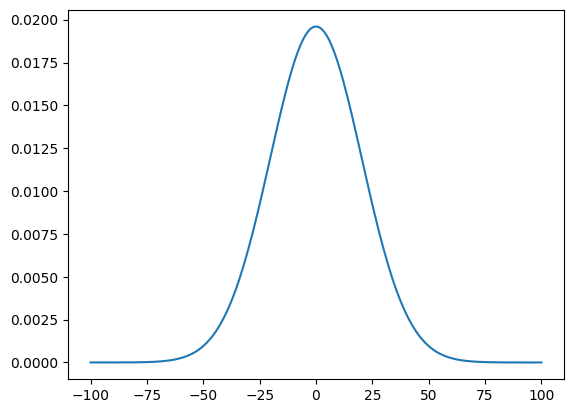

In [16]:
Z = np.linspace(start=-1*L,stop=L,num=2*L+1)
Y = np.sqrt(m/(2*np.pi*k*T)) * np.exp(-1.0*m*Z*Z/(2.0*k*T))
plt.plot(Z,Y)
plt.show()
#for i in range(100):
#    print(boltzmann_rand(300))

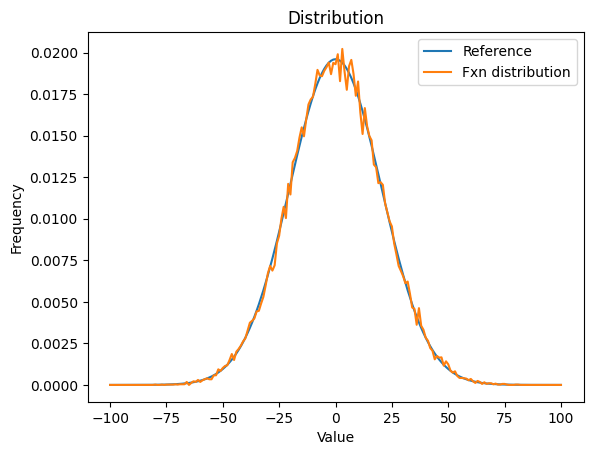

In [19]:
arr = np.zeros((ns),dtype=int)
for i in range(ns):
    arr[i] = boltzmann_rand(T)

boltzmann_data = np.zeros((2*L+1),dtype=int)
for i in range(ns):
    boltzmann_data[arr[i]+L]+=1

plt.plot(Z,Y)
plt.plot(Z,boltzmann_data/ns)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.legend(['Reference','Fxn distribution'])
plt.show()